In [212]:
%reload_ext autoreload
%autoreload 2
from boat_models import Boat, TwoInputBoat, ThreeInputBoat
import numpy as np
from IPython.display import HTML
from states_initialization import states_initialization,icp_shape_initialization
from trajectory_planner import BoatConfigurationPlanning, bold
import pickle

# Results

### Load Experiments

In [2]:
label = '(init)'
with open('results/experiments'+label+'.pickle', 'rb') as f:
    print f
    experiments = pickle.load(f)

label = '(min_interboat_clearance=0.4)'
with open('results/experiments'+label+'.pickle', 'rb') as f:
    experiments_clearance = pickle.load(f)

<open file 'results/experiments(init).pickle', mode 'rb' at 0x7fbe6a84c0c0>


## Tables

In [3]:
from tabulate import tabulate

def table(experiments, name_field='example_name', name_col_name='name'):
    U_squared = [np.sum(experiment['U']**2/experiment['N'])/len(experiment['S']) for experiment in experiments]
    U_squared_max = [np.max(np.sum(np.sum(experiment['U']**2/experiment['N'], axis=-1),axis=-1)) for experiment in experiments]
    col_names = ['name', 'final time', 'calc time', 'U squares', 'U squares max', 'solution status']
    return tabulate([[experiments[i][name_field], experiments[i]['time'], experiments[i]['solve_time'], U_squared[i], U_squared_max[i], experiments[i]['result']] for i in range(len(experiments))], headers=col_names)

In [5]:
example_names = ['1 Boat Move', '2 Boat Line Rotate','4 Boat Line Rotate', '4 Boat Line to Grid', '4 Boat Grid Rotate', '4 Boat Triangle Rotate', '9 Boat Triangle to Grid', '9 Boat Line to Grid', '9 Boat Grid Rotate']
init_keys = ['no_init','init','init_expansion','init_shape','init_shape_expansion']

def print_tables(experiments_arrays, boat_type, by_init=True, labels=[''], for_paper=False):
    print bold(boat_type)
    print bold('-------------')
    if by_init:
        if for_paper:
            for name in experiments_arrays[0][boat_type]:
                if name in [init_keys[0], init_keys[1], init_keys[3]]:
                    for experiments,label in zip(experiments_arrays, labels):
                        print bold(label)
                        print bold(name)
                        experiment_table = table(experiments[boat_type][name])
                        print experiment_table
        else:
            for name in experiments_arrays[0][boat_type]:
                for experiments,label in zip(experiments_arrays, labels):
                    print bold(label)
                    print bold(name)
                    experiment_table = table(experiments[boat_type][name])
                    print experiment_table
    else:
        for example_name in example_names:
            for experiments,label in zip(experiments_arrays, labels):
                print bold(label)
                print bold(example_name)
                example_experiments = [experiments[boat_type][name][i] for name in experiments[boat_type] for i in range(len(experiments[boat_type][name])) if experiments[boat_type][name][i]['example_name']==example_name]
                experiment_table = table(example_experiments, name_field='init_name', name_col_name='initialization')
                print experiment_table
                print 

## Results by Experiment

In [6]:
#print experiments['Boat']['no_init']
print_tables([experiments, experiments_clearance], 'twoInputBoat', labels=['0m clearance', '0.4m clearance'], by_init=False)

twoInputBoat
-------------
0m clearance
1 Boat Move
name                               final time    calc time    U squares  solution status
-------------------------------  ------------  -----------  -----------  -----------------------------
none                                  9.32123    0.053364       334.496  SolutionResult.kSolutionFound
interpolate                           9.32123    0.0431759      334.496  SolutionResult.kSolutionFound
interpolate shape                     9.32123    0.0548248      334.496  SolutionResult.kSolutionFound
interpolate expansion                 9.32123    0.0593948      334.496  SolutionResult.kSolutionFound
interpolate expansion and shape       9.32123    0.061821       334.495  SolutionResult.kSolutionFound

0.4m clearance
1 Boat Move
name                               final time    calc time    U squares  solution status
-------------------------------  ------------  -----------  -----------  -----------------------------
interpolate          

In [7]:
print_tables([experiments, experiments_clearance], 'threeInputBoat', labels=['0m clearance', '0.4m clearance'], by_init=False)

threeInputBoat
-------------
0m clearance
1 Boat Move
name                               final time    calc time    U squares  solution status
-------------------------------  ------------  -----------  -----------  -----------------------------
none                                  9.32123    0.0960131      334.496  SolutionResult.kSolutionFound
interpolate                           9.32123    0.079206       334.496  SolutionResult.kSolutionFound
interpolate shape                     9.32123    0.097199       334.496  SolutionResult.kSolutionFound
interpolate expansion                 9.32123    0.0861411      334.496  SolutionResult.kSolutionFound
interpolate expansion and shape       9.32123    0.105158       334.496  SolutionResult.kSolutionFound

0.4m clearance
1 Boat Move
name                               final time    calc time    U squares  solution status
-------------------------------  ------------  -----------  -----------  -----------------------------
interpolate        

In [8]:
print_tables([experiments, experiments_clearance], 'Boat', labels=['0m clearance', '0.4m clearance'], by_init=False)

Boat
-------------
0m clearance
1 Boat Move
name                               final time    calc time    U squares  solution status
-------------------------------  ------------  -----------  -----------  -----------------------------
none                                  6.45285     0.676976      405.334  SolutionResult.kSolutionFound
interpolate                           6.45285     0.663809      405.293  SolutionResult.kSolutionFound
interpolate shape                     6.45285     0.598468      405.411  SolutionResult.kSolutionFound
interpolate expansion                 6.45285     0.560224      405.18   SolutionResult.kSolutionFound
interpolate expansion and shape       6.45285     0.670116      405.288  SolutionResult.kSolutionFound

0.4m clearance
1 Boat Move
name                               final time    calc time    U squares  solution status
-------------------------------  ------------  -----------  -----------  -----------------------------
interpolate                  

In [309]:
print_tables([experiments], 'Boat', labels=['0m clearance'], by_init=True, for_paper=True)

Boat
-------------
0m clearance
no_init
name                       final time    calc time    U squares    U squares max  solution status
-----------------------  ------------  -----------  -----------  ---------------  ------------------------------
1 Boat Move                   6.45285     0.676976    62.8147           62.8147   SolutionResult.kSolutionFound
2 Boat Line Rotate           10.7494      8.24891     61.8639           62.8857   SolutionResult.kIterationLimit
4 Boat Line Rotate           12.5229     55.3044      12.3837           16.1863   SolutionResult.kIterationLimit
4 Boat Line to Grid           9.13409    92.237       50.493            63.0302   SolutionResult.kSolutionFound
4 Boat Grid Rotate           11.8662     76.5047      28.7311           34.7446   SolutionResult.kIterationLimit
4 Boat Triangle Rotate       44.5155     70.3947       3.03018           4.04695  SolutionResult.kIterationLimit
9 Boat Triangle to Grid      47.7528    120.364        0.646975          

# Animations

In [7]:
%reload_ext autoreload
%autoreload 2
from states_initialization import states_initialization
from trajectory_planner import BoatConfigurationPlanning
import matplotlib.animation as animation
import matplotlib.pyplot as plt


boat = Boat(min_interboat_clearance=0)

def demo_save(experiment, demo_name=None, save=True):
    anim = boat.plot_animation(experiment['S'])
    anim_init = boat.plot_animation(experiment['S_init'])
    if save:
        assert demo_name is not None
        anim.save('animations/%s.mp4' % demo_name, dpi=400)
        anim_init.save('animations/%s_init.mp4' % demo_name, dpi=400)
    return anim, anim_init

## Show Animation

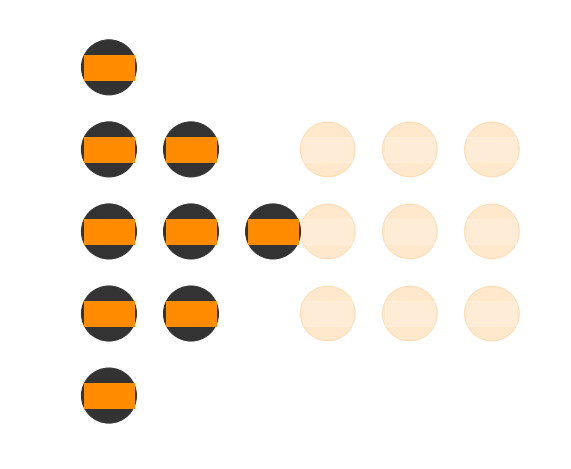

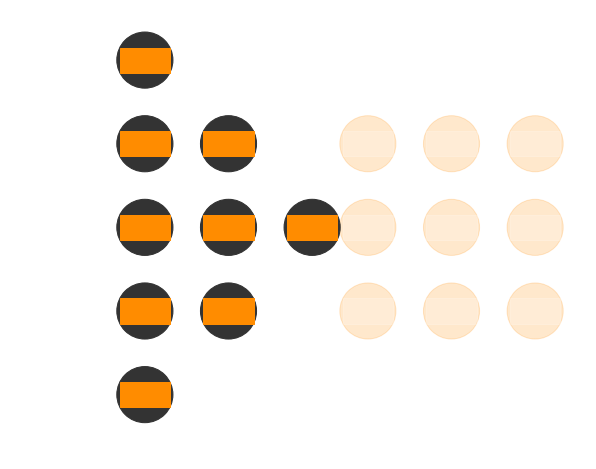

In [211]:
experiment = experiments_clearance['Boat'][init_keys[3]][6]
anim, anim_init = demo_save(experiment, save=False)

### Initialization

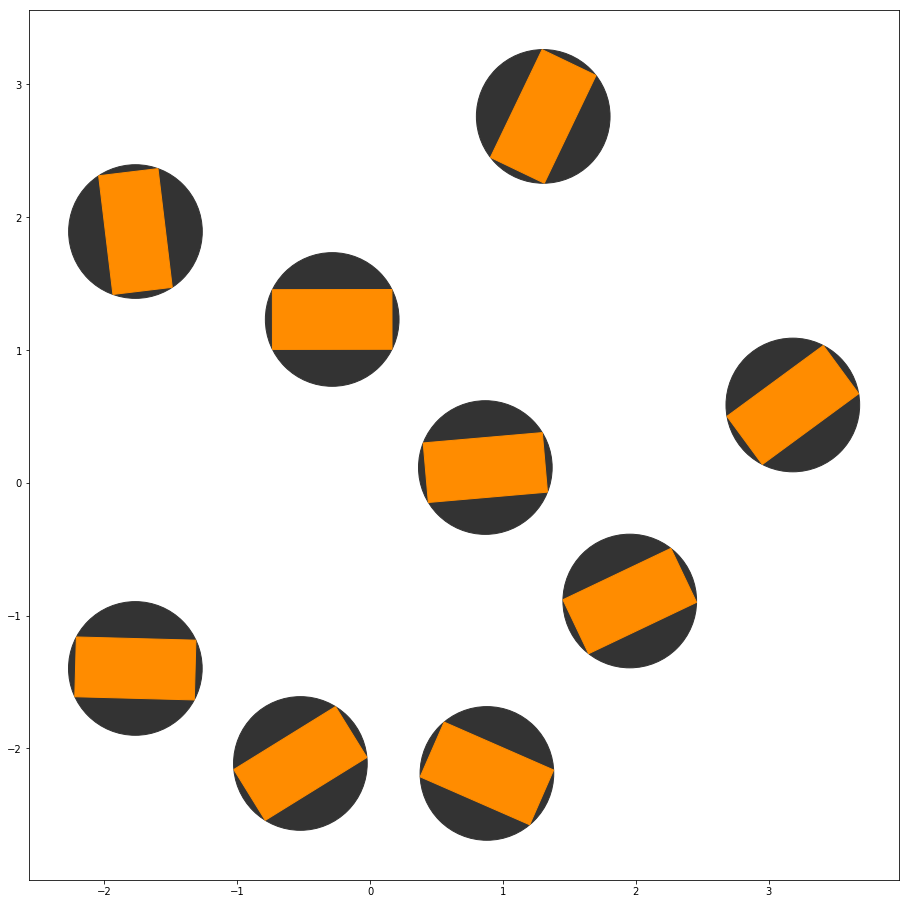

In [215]:
p, r = boat.plot_configuration(experiment['S'][:,30])

a = p[0]
a._an

In [204]:
HTML(anim_init.to_html5_video())

### Trajectory

In [9]:
HTML(anim.to_html5_video())

## Save Animations

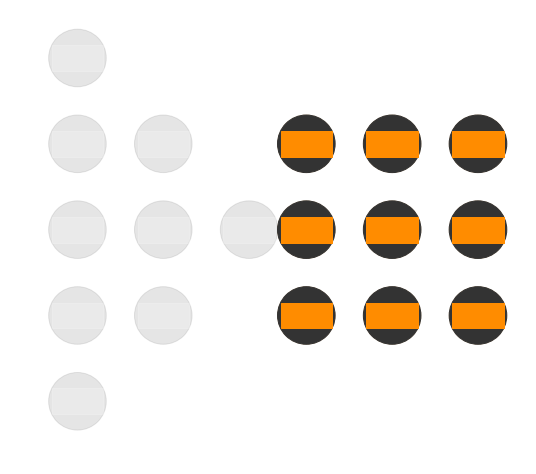

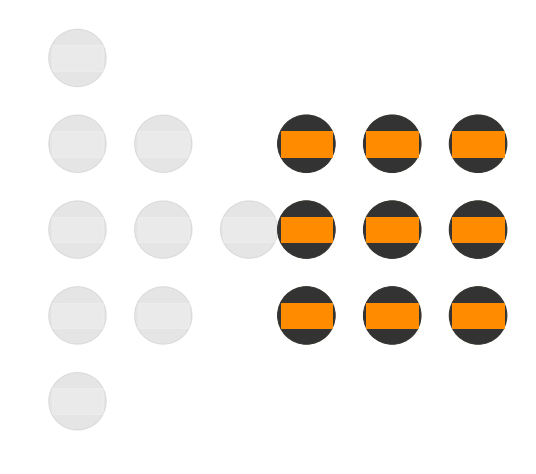

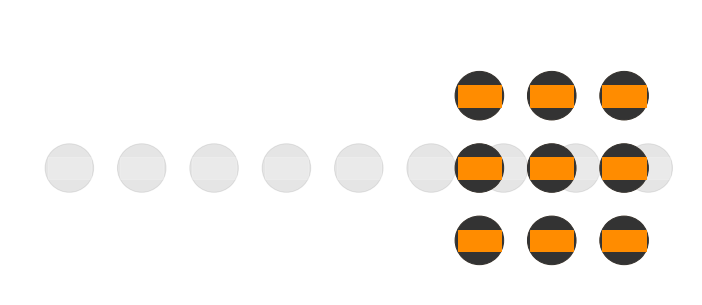

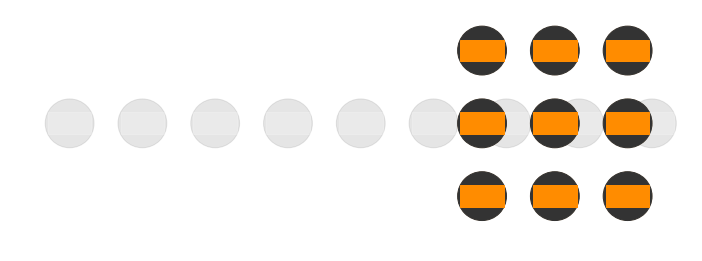

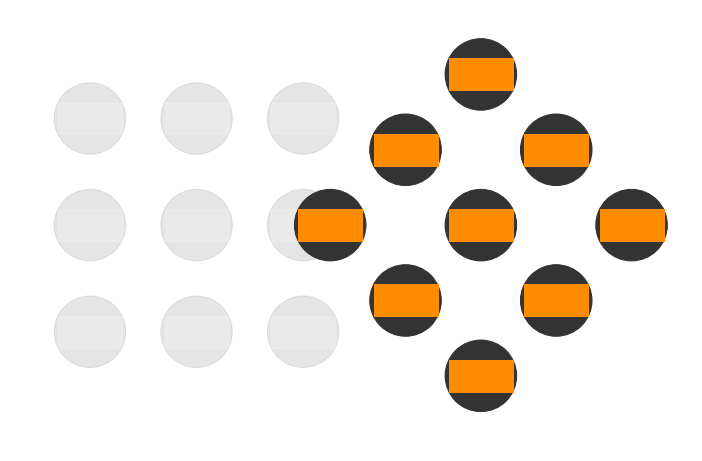

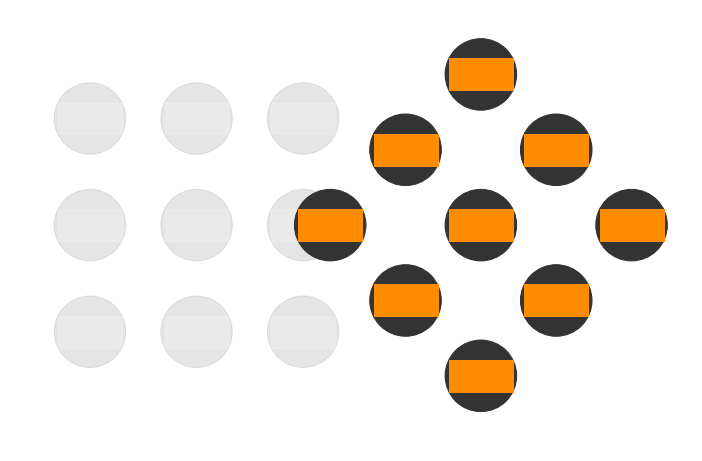

In [229]:
demo_names = ['Boat_triangle2grid_linear', 'Boat_line2grid_linear', 'Boat_gridRotate_linear']

for demo_name,i in zip(demo_names, range(6,9)):
    anim,anim_init = demo_save(experiments['Boat'][init_keys[1]][i], demo_name, save=True)

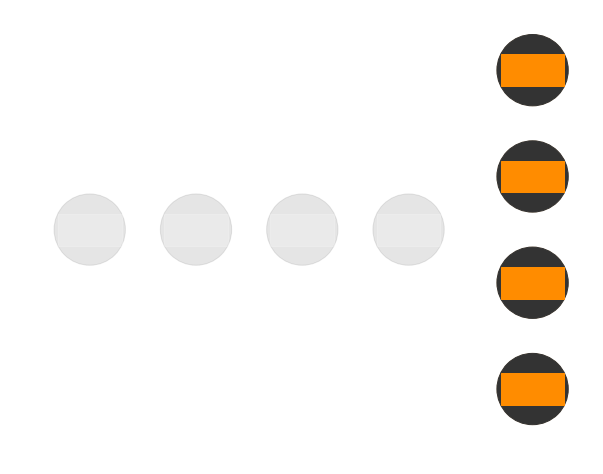

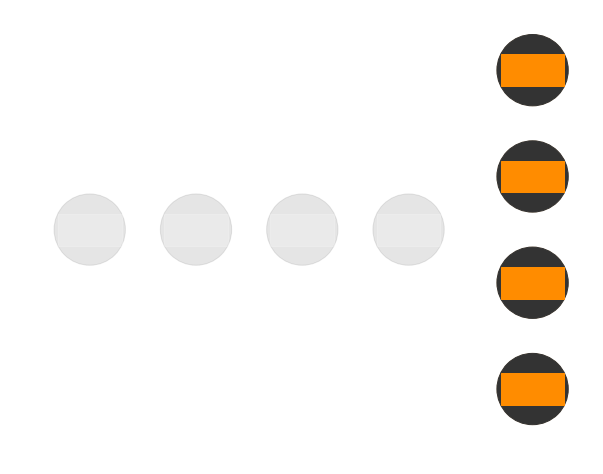

In [230]:
boat = Boat(min_interboat_clearance=0)
anim, anim_init = demo_save(experiments['Boat'][init_keys[1]][2], 'Boat_lineRotate_linear', save=True)

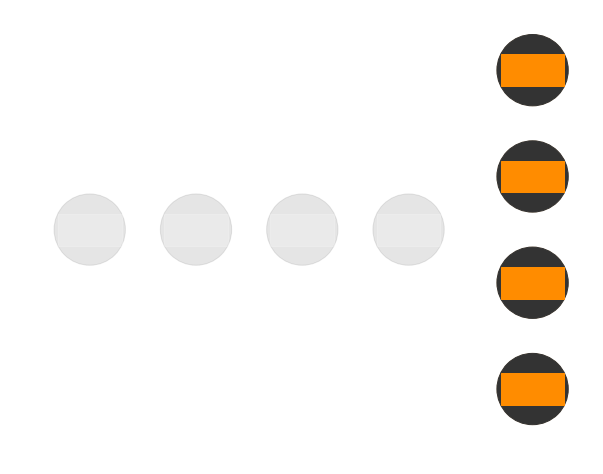

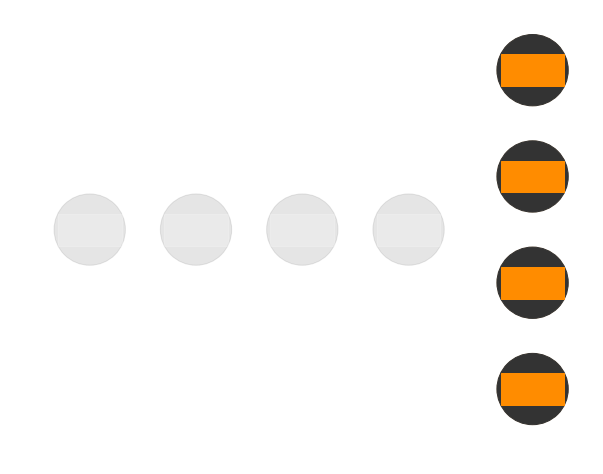

In [231]:
boat = Boat(min_interboat_clearance=0)
anim, anim_init = demo_save(experiments['Boat'][init_keys[3]][2], 'Boat_lineRotate_shape', save=True)

In [ ]:
boat = Boat(min_interboat_clearance=0)
anim, anim_init = demo_save(experiments['Boat'][init_keys[3]][-1], 'Boat_gridRotate_shape', save=True)

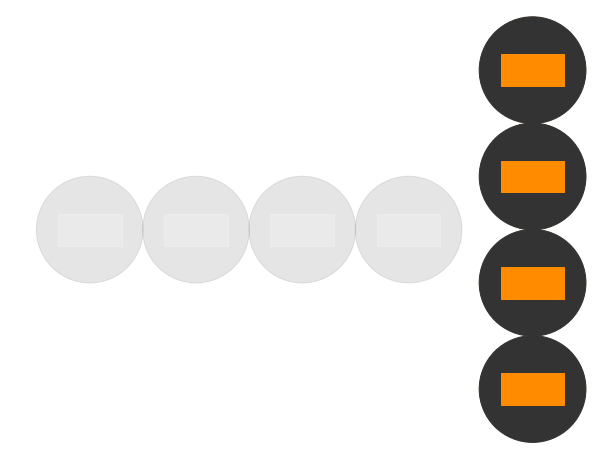

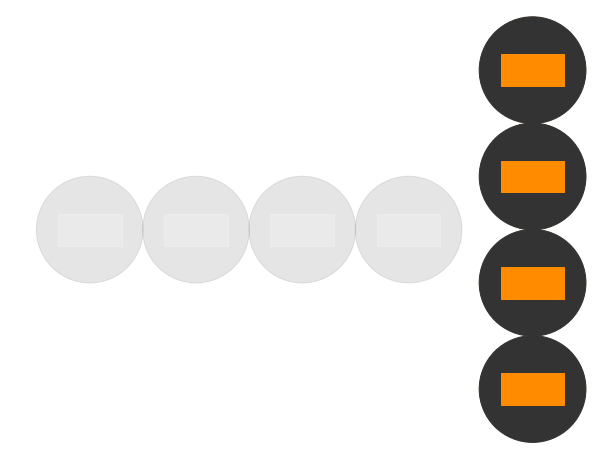

In [232]:
boat = Boat(min_interboat_clearance=0.5)
anim, anim_init = demo_save(experiments_clearance['Boat'][init_keys[1]][2], 'Boat_lineRotate_linear_clearance', save=True)

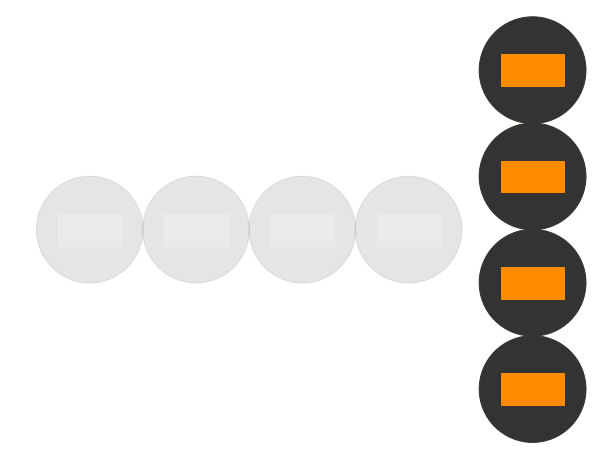

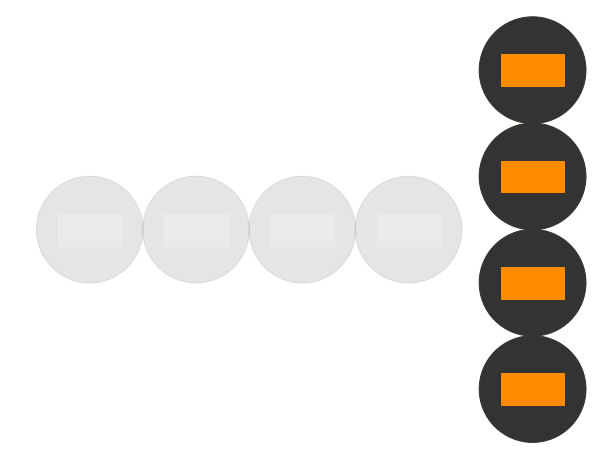

In [233]:
boat = Boat(min_interboat_clearance=0.5)
anim, anim_init = demo_save(experiments_clearance['Boat'][init_keys[3]][2], 'Boat_lineRotate_shape_clearance', save=True)

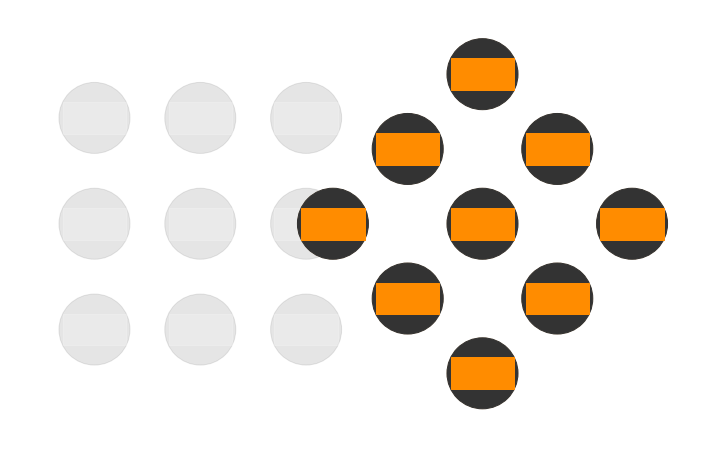

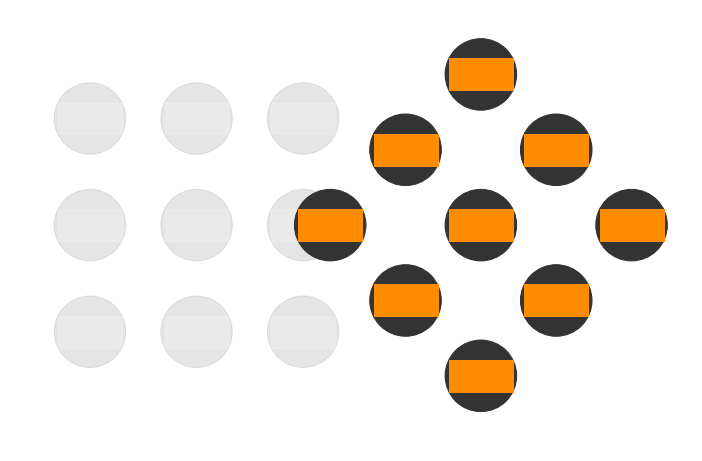

In [234]:
boat = Boat(min_interboat_clearance=0)
anim, anim_init = demo_save(experiments['Boat'][init_keys[0]][-1], 'Boat_gridRotate_none', save=True)

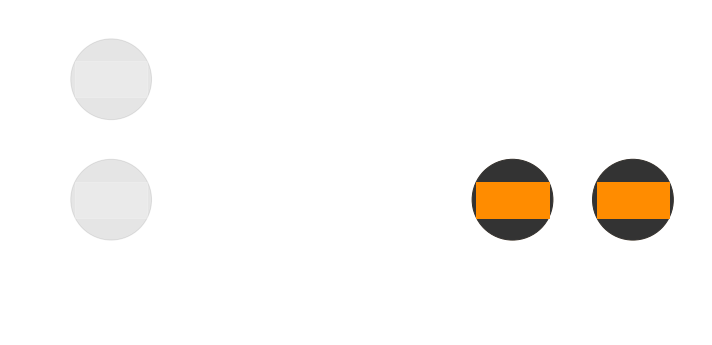

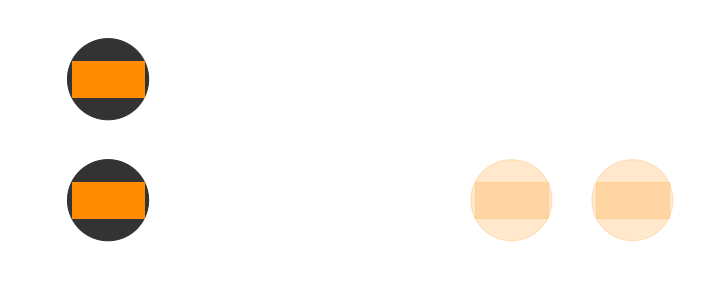

In [186]:
boat = Boat(min_interboat_clearance=0)
anim, anim_init = demo_save(experiments['Boat'][init_keys[0]][1], 'Boat_2move_none', save=False)
HTML(anim.to_html5_video())

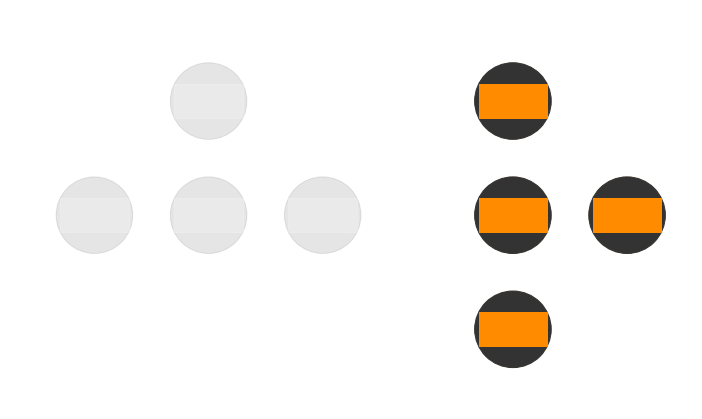

In [275]:
boat = Boat(min_interboat_clearance=0)
anim = boat.plot_animation(experiments['Boat'][init_keys[3]][5]['S_init'])
HTML(anim.to_html5_video())

# Plots

## Formation over time

(9, 101, 6)


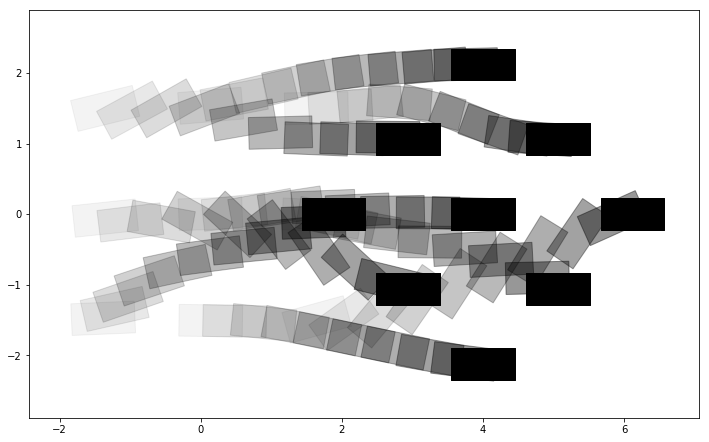

In [20]:
boat = Boat()

experiment_states = experiments['Boat'][init_keys[1]][-1]['S']
experiment_init = experiments['Boat'][init_keys[1]][-1]['S_init']
boat.plot_configurations(experiment_states)

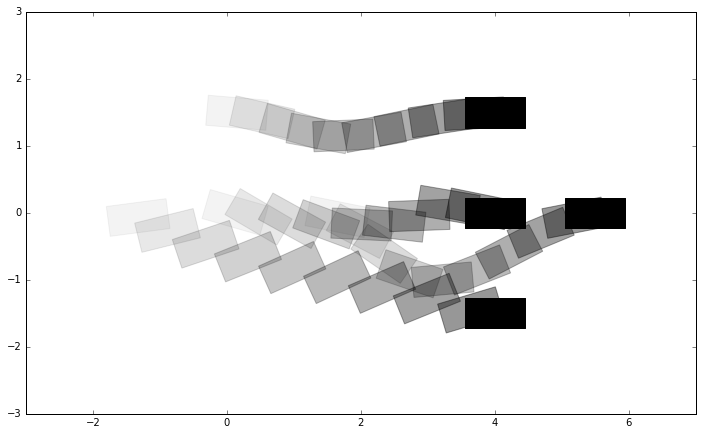

In [41]:
boat = Boat()

experiment_states = experiments['Boat'][init_keys[3]][-4]['S']
boat.plot_configurations(experiment_states)

## Trajectories

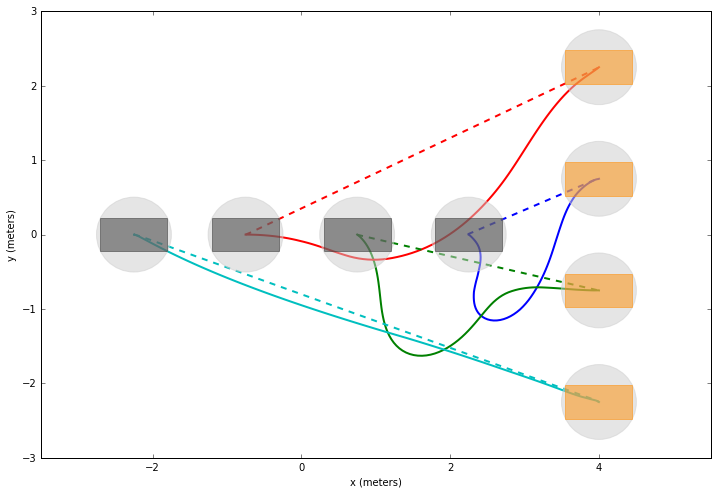

In [335]:
boat = Boat()

experiment_states = experiments['Boat'][init_keys[1]][2]['S']
experiment_init = experiments['Boat'][init_keys[1]][2]['S_init']
plot = plt.subplots(nrows=1,ncols=1, figsize=(12,8))
boat.plot_x0xN(experiment_states, [0.5], [0.5], boat_color0='0.2', region_color0='0.8', region_colorN='0.8', plot=plot)
boat.plot_trajectories(experiment_states, color=None, plot=plot)
boat.plot_trajectories(experiment_init, plot=plot, color=None, linestyle='--')
plt.xlabel('x (meters)')
plt.ylabel('y (meters)')
plt.show()

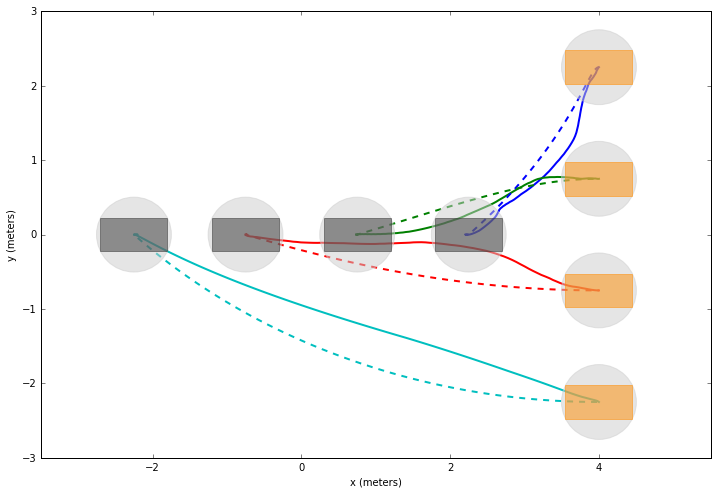

In [334]:
boat = Boat()

experiment_states = experiments['Boat'][init_keys[3]][2]['S']
experiment_init = experiments['Boat'][init_keys[3]][2]['S_init']
plot = plt.subplots(nrows=1,ncols=1, figsize=(12,8))
boat.plot_x0xN(experiment_states, [0.5], [0.5], boat_color0='0.2', region_color0='0.8', region_colorN='0.8', plot=plot)
boat.plot_trajectories(experiment_states, color=None, plot=plot)
boat.plot_trajectories(experiment_init, plot=plot, color=None, linestyle='--')
plt.xlabel('x (meters)')
plt.ylabel('y (meters)')
plt.show()

## Torques and Velocities

In [323]:
def inputs_plot(experiment_inputs):
    sum_u = np.sum(np.abs(experiment_inputs),axis=2).T
    sum_u_avg =  np.average(sum_u, axis=1)
    plt.plot(sum_u)
    plt.plot(sum_u_avg,  color='black',linewidth='3')
    plt.show()
    
def velocity_plots(experiment_states):
    norm_v = np.linalg.norm(experiment_states[:,:,3:],axis=2).T
    norm_v_avg =  np.average(norm_v, axis=1)
    plt.plot(norm_v)
    plt.plot(norm_v_avg,  color='black',linewidth='3')
    plt.show()
    
def input_and_velocity_plot(experiment):
    experiment_states = experiment['S']
    experiment_inputs = experiment['U']  
    inputs_plot(experiment_inputs**2)
    velocity_plots(experiment_states)

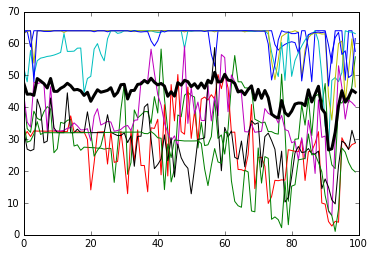

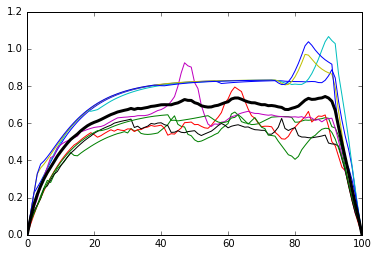

In [338]:
experiment = experiments['Boat'][init_keys[1]][-3]
input_and_velocity_plot(experiment)

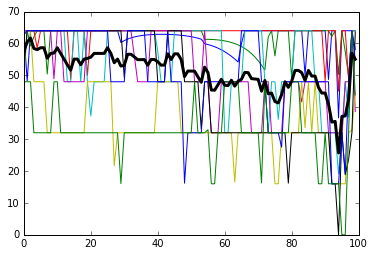

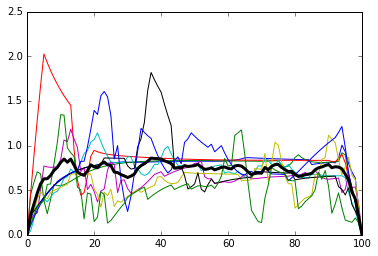

In [339]:
experiment = experiments['Boat'][init_keys[3]][-3]
input_and_velocity_plot(experiment)

## Start and End State

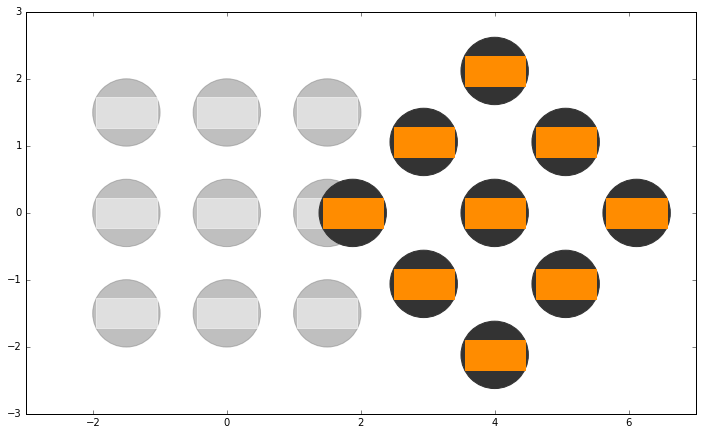

In [260]:
experiment_states = experiments['Boat'][init_keys[1]][8]['S']

boat.plot_x0xN(experiment_states)
x_shape = states_initialization.func_closure

## Slow Trajectory and Export for Pool 

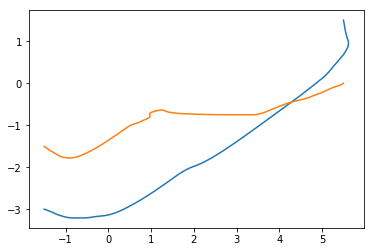

In [242]:
plt.figure()
exp = experiments_clearance['threeInputBoat'][init_keys[3]][6]
plt.plot(exp['S'][0,:,0],exp['S'][0,:,1])
plt.plot(exp['S'][1,:,0],exp['S'][1,:,1])
plt.show()

In [243]:
import copy 
exp = experiments_clearance['threeInputBoat'][init_keys[3]][6]

u_rate_scaling = (0.2/(exp['time']/len(exp['S'][0])))
length_scaling = 2

scaling = length_scaling * u_rate_scaling

print 'scaling factor', scaling

exp = {'S':np.array(exp['S']), 'U':np.array(exp['U'])}

exp['S'][:,:,3:]/=scaling
exp['U']/=scaling**2

S = np.zeros((exp['S'].shape[0],2*exp['S'].shape[1]-1,exp['S'].shape[2]))
U = np.zeros((exp['U'].shape[0],2*exp['U'].shape[1]-1,exp['U'].shape[2]))


S[:,::2,:] = exp['S']
S[:,1::2,:] = (exp['S'][:,:-1,:] + exp['S'][:,1:,:])/2.

U[:,::2,:] = exp['U']
U[:,1::2,:] = (exp['U'][:,:-1,:] + exp['U'][:,1:,:])/2.

label = 'triangle_to_grid_basic_all(min_interboat_clearance=0.4)'
with open('results/experiment_'+label+'.pickle', 'wb') as f:
    pickle.dump(exp, f)
with open('results/experiment_'+label+'.pickle', 'wb') as f:
    pickle.dump({'S':exp['S'][:2], 'U':exp['U'][:2]}, f)

XY = np.copy(S[:,:,:2])
    
S[:,:,0] = -XY[:,:,1]
S[:,:,1] = XY[:,:,0]

U = S[:,1:,3:]-S[:,:-1,3:]

print np.max(S[:,:,3:], axis=1)

np.savetxt("boatdancing_test_boat1.txt", np.hstack((S[0,:-1,:],U[0,:,:])), delimiter=",")
np.savetxt("boatdancing_test_boat2.txt", np.hstack((S[1,:-1,:],U[1,:,:])), delimiter=",")
    

scaling factor 2.230529660423206
[[0.2241618  0.16811759 0.        ]
 [0.22414757 0.15988452 0.        ]
 [0.224162   0.12091678 0.        ]
 [0.22410918 0.         0.        ]
 [0.22393107 0.         0.        ]
 [0.22391082 0.15403975 0.        ]
 [0.20539479 0.14532803 0.        ]
 [0.21297167 0.14028647 0.        ]
 [0.19336882 0.16249367 0.        ]]


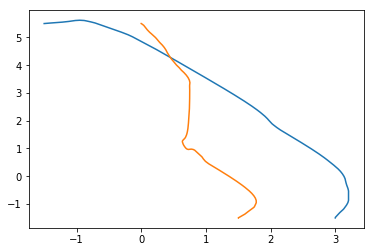

In [244]:
plt.figure()
plt.plot(S[0,:,0],S[0,:,1])
plt.plot(S[1,:,0],S[1,:,1])
plt.show()

### Experimental Data

In [239]:
boat1_exp = np.genfromtxt('results/BOAT_DANCE_LOG20190125_144333_numpy.csv',delimiter=',')
boat2_exp = np.genfromtxt('results/BOAT_DANCE_LOG20190125_145007_numpy.csv',delimiter=',')
boat1a_exp = np.genfromtxt('results/BOAT_DANCE_LOG20190125_144203_numpy.csv',delimiter=',')
boat1b_exp = np.genfromtxt('results/BOAT_DANCE_LOG20190125_144035_numpy.csv',delimiter=',')
boat2a_exp = np.genfromtxt('results/BOAT_DANCE_LOG20190125_145146_numpy.csv',delimiter=',')


In [240]:
offset = 16

vals1 = boat1b_exp[offset:,:6]
refs1 = boat1b_exp[offset:,6:]

vals1[:,:2] -=2
refs1[:,:2] -=2


vals2 = boat2a_exp[offset:,:6]
refs2 = boat2a_exp[offset:,6:]

vals2[:,:2] -=2
refs2[:,:2] -=2

min_len = min(vals1.shape[0],vals2.shape[0])

collisions
between test boats 1 and 2 0
test boat 0, sim boat 2, num collisions 0
test boat 1, sim boat 2, num collisions 44
test boat 0, sim boat 3, num collisions 0
test boat 1, sim boat 3, num collisions 20
test boat 0, sim boat 4, num collisions 0
test boat 1, sim boat 4, num collisions 0
test boat 0, sim boat 5, num collisions 0
test boat 1, sim boat 5, num collisions 0
test boat 0, sim boat 6, num collisions 0
test boat 1, sim boat 6, num collisions 0
test boat 0, sim boat 7, num collisions 0
test boat 1, sim boat 7, num collisions 0
test boat 0, sim boat 8, num collisions 0
test boat 1, sim boat 8, num collisions 0


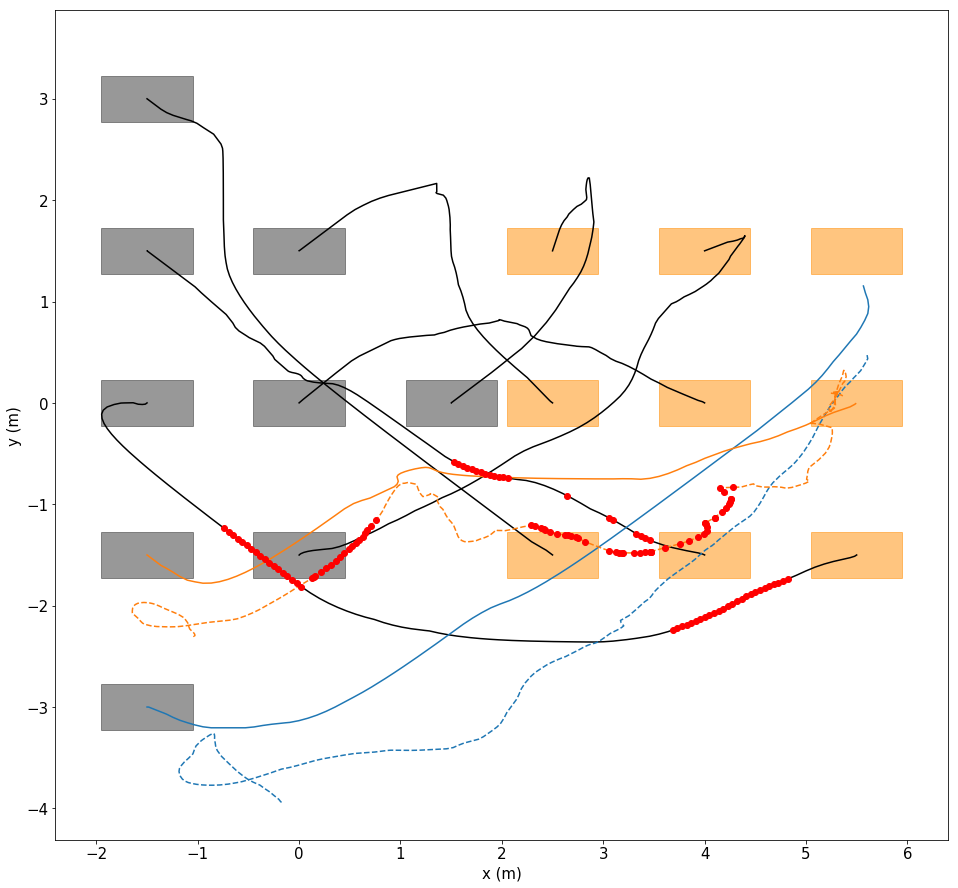

In [210]:
plot = plt.subplots(nrows=1,ncols=1, figsize=(16,16))

boat.plot_x0xN(exp['S'], [0.5], [0.5], boat_color0='0.2', region_color0='1', region_colorN='1', plot=plot)

for i in range(2,9):
    plt.plot(S[i,:,1], -S[i,:,0], 'black')
    
plt.plot(vals1[:,1],-vals1[:,0], 'C0--')
plt.plot(refs1[:,1],-refs1[:,0], 'C0')

plt.plot(vals2[:,1],-vals2[:,0], 'C1--')
plt.plot(refs2[:,1],-refs2[:,0], 'C1')

collisions = np.zeros((S.shape[0],min_len))
dists = np.sum((vals1[:min_len]-vals2[:min_len])[:,:2]**2, axis=1)<boat.min_interboat_distance_squared
print "collisions"
print 'between test boats 1 and 2', np.sum(dist)
for i in range(2,9):
    for j in range(2):
        b = [vals1, vals2][j]
        dists = np.sum((S[i,:min_len]-b[:min_len])[:,:2]**2, axis=1)<boat.min_interboat_distance_squared
        collisions[i, dists] = 1
        collisions[j, dists] = 1
        print 'test boat %d, sim boat %d, num collisions %d' % (j,i, np.sum(dists))
        plt.plot(S[i,:min_len][dists][:,1], -S[i,:min_len][dists][:,0], 'ro')
        plt.plot(b[:min_len][dists][:,1], -b[:min_len][dists][:,0], 'ro')
plt.xlabel("x (m)", fontsize=15)
plt.ylabel("y (m)", fontsize=15)
plt.tick_params(labelsize=15)
plt.show()

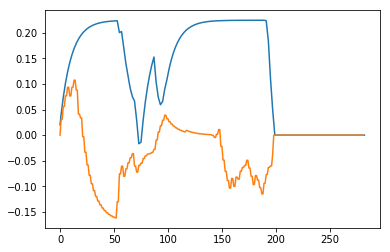

In [241]:
plt.plot(refs2[:,3])
plt.plot(5*(refs2[1:,0]-refs2[:-1,0]))

#plt.plot(refs2[:,4])
#plt.plot(5*(refs2[1:,1]-refs2[:-1,1]))